In [2]:
#Import libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import matplotlib.animation as animation
from matplotlib.animation import FuncAnimation
from mpl_toolkits.mplot3d import axes3d

# JNB LAB: Patterns

:::{note}
This lab gives an overview of some of the features that can be included in a Jupyter Notebook (JNB). This can be reviewed quickly before proceeding to the next chapter.
:::

In this lab, we use the theme of 'Patterns' to introduce a variety of functions that can be done using JNBs from a pre-college to REU level:

I. PATTERNS IN NATURE (Pre-college)

[1.1 Displaying an Image](imagedisplay)

[1.2 Displaying a YouTube Video](displayyoutube)


II. PATTERNS IN SOCIAL DATA (Exploratory Data Analysis) 

[2.1 Reading in CPS Data from the Chicago Data Portal](readcps)

[2.2 Streamlining the Data](streamlinedata)

[2.3 Simplifying the Column Names](simplifycolumns)

[2.4 Making a Scatterplot with OLS Regression line](scatterols)
  
  
III. PATTERNS IN MATHEMATICS (Undergrad math)

[3.1 Tracing a Parametric Curve](plotparametric)

[3.2 Plotting Quadric Surfaces and Level Curves](plotquadric)


IV.APPLYING MATHEMATICAL PATTERNS TO NATURE AND SOCIETY (REU)

[4.1 Identifying Streamlines of Polluted and Freshwater Flow](pollutedstreamlines)


(patterns)=
## Patterns in Nature

```{index} display; image
```

```{index} display; youtube video
```


Patterns in nature are a beautiful and interesting phenomenon 

(imagedisplay)=
### Displaying an Image

a) Here is a NASA Hubble photograph of an exploding supernova. (The image files are available [here](https://drive.google.com/drive/folders/19NpdHc7gftVLFcHst-gyxPk3ZDlIsCxc?usp=sharing)).

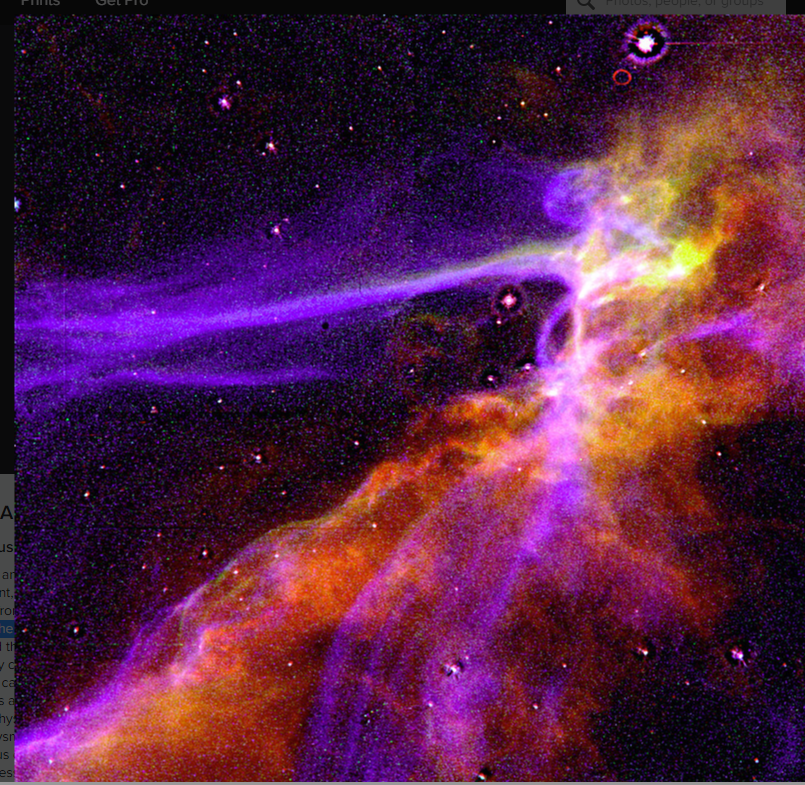

In [2]:
from IPython.display import Image
Image(filename='supernova.png',width=100,height=100)

:::{admonition} Exercise 1a

Display another beautiful natural pattern shown in the file 'MtFuji.png'.
:::

(displayyoutube)=
### Displaying a YouTube Video

::::{only} latex
:::{note}
Please visit {{ '[the web version of this section]({website}/{path}.html)'.format(website=web_ver_url, path=env.docname) }} to engage with this interactive resource.
:::
::::

Patterns can arise arise in natural dynamical systems. For example, here is a scene of waves shown in the  video 
 “Ocean Waves.” YouTube, uploaded by 
BusyBoy Productions
, 14 February 2020, https://www.youtube.com/watch?v=J7pBztjUqUc&t=14s. Permissions: YouTube Terms of Service
 
 

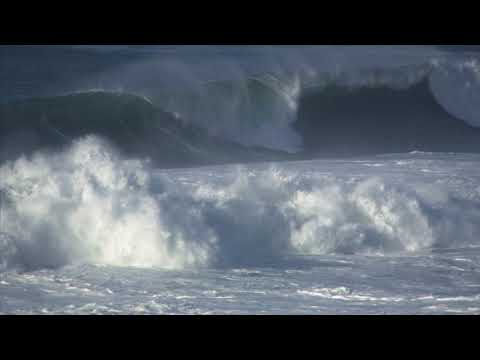

In [3]:
from IPython.display import YouTubeVideo
YouTubeVideo('J7pBztjUqUc',width=100,height=100)

:::{admonition} Exercise 1b

Display another video of a dynamic pattern from nature shown in the video 

“Waterfall Clip.” YouTube, uploaded by 
Bradley Erickson
, 21 June 2016, https://www.youtube.com/watch?v=oYEtLQ3lEH0&t=5s. Permissions: YouTube Terms of Service
 
 
:::

(socialpattern)=
## Patterns in Societal Data 

Individual people, groups, and societies as a special part of the natural world give rise to patterns which can be analyzed using data. 
Here is an example using schools in zip code 60623.  See the section [OLS Linear Regression](./Advanced/LinearAlgebra/OLS/jnb1.ipynb)

(readcps)=
### Reading in CPS Data from the Chicago Data Portal

We use the Pandas (Python Data Analysis) library (abbreviated as pd) to read in the data. The '.head(2)' command displays the first two rows.  We can also list the columns using the '.columns' command.

In [3]:
raw_CPS_data=  pd.read_json('https://data.cityofchicago.org/resource/kh4r-387c.json?$limit=100000')
raw_CPS_data.head(2) 

,school_id,legacy_unit_id,finance_id,short_name,long_name,primary_category,is_high_school,is_middle_school,is_elementary_school,is_pre_school,...,fifth_contact_title,fifth_contact_name,seventh_contact_title,seventh_contact_name,refugee_services,visual_impairments,freshman_start_end_time,sixth_contact_title,sixth_contact_name,hard_of_hearing
0,609966,3750,23531,HAMMOND,Charles G Hammond Elementary School,ES,False,True,True,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,400069,4150,67081,POLARIS,Polaris Charter Academy,ES,False,True,True,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
raw_CPS_data.columns

Index(['school_id', 'legacy_unit_id', 'finance_id', 'short_name', 'long_name',
       'primary_category', 'is_high_school', 'is_middle_school',
       'is_elementary_school', 'is_pre_school', 'summary',
       'administrator_title', 'administrator', 'secondary_contact_title',
       'secondary_contact', 'address', 'city', 'state', 'zip', 'phone', 'fax',
       'cps_school_profile', 'website', 'facebook', 'attendance_boundaries',
       'grades_offered_all', 'grades_offered', 'student_count_total',
       'student_count_low_income', 'student_count_special_ed',
       'student_count_english_learners', 'student_count_black',
       'student_count_hispanic', 'student_count_white', 'student_count_asian',
       'student_count_native_american', 'student_count_other_ethnicity',
       'student_count_asian_pacific', 'student_count_multi',
       'student_count_hawaiian_pacific', 'student_count_ethnicity_not',
       'statistics_description', 'demographic_description', 'dress_code',
       'pre

(streamlinedata)=
### Streamlining the Data 

In the next cell, we first create a dataframe df1 which includes just four columns:
['address','student_count_total','student_count_black','student_count_hispanic','student_count_white','zip']
and then filter to zipcode 60623. We then drop rows with missing data and give the total number of schools, as well as the largest and the smallest schools.

In [6]:
df1=raw_CPS_data[['address','student_count_total','student_count_black','student_count_hispanic','zip']]
df1=df1[df1["zip"]==60623]
df1=df1.dropna()
df1=df1.reset_index(drop=True) #rows are labelled 0,1,2,...
print("Total number of CPS schools considered in 60623 is",len(df1["zip"])) #len = length
print("Largest student_count_total = ",df1["student_count_total"].max())
print("Smallest student_count_total = ",df1["student_count_total"].min())
df1.head(2)

Total number of CPS schools considered in 60623 is 35
Largest student_count_total =  1072
Smallest student_count_total =  96


,address,student_count_total,student_count_black,student_count_hispanic,zip
0,2819 W 21ST PL,342,33,304,60623
1,2345 S CHRISTIANA AVE,559,66,484,60623


(simplifycolumns)=
### Simplifying the Column Names 

We will abbreviate the column names as ["address","total","black","hispanic"]

and then add 2 new columns '%black', '%hispanic'.

In [7]:
df1.columns= ["address","total","black","hispanic","zip"]
for i in df1.index:
    df1.loc[i,'%black']=round(100*df1.loc[i,'black']/df1.loc[i,'total'],1)
    df1.loc[i,'%hispanic']=round(100*df1.loc[i,'hispanic']/df1.loc[i,'total'],1)
df1.head(2)

,address,total,black,hispanic,zip,%black,%hispanic
0,2819 W 21ST PL,342,33,304,60623,9.6,88.9
1,2345 S CHRISTIANA AVE,559,66,484,60623,11.8,86.6


```{index} scatterplot
```

```{index} OLS linear regression
```


(scatterols)=
### Making a Scatterplot with OLS Regression Line

The plot indicates %black (x-axis) vs. %hispanic (y-axis) and includes the OLS regression line on the plot

Intercept is  [98.71284906]
Slope is  [[-0.99515441]]
R^2 for OLS is  0.9996943205528053


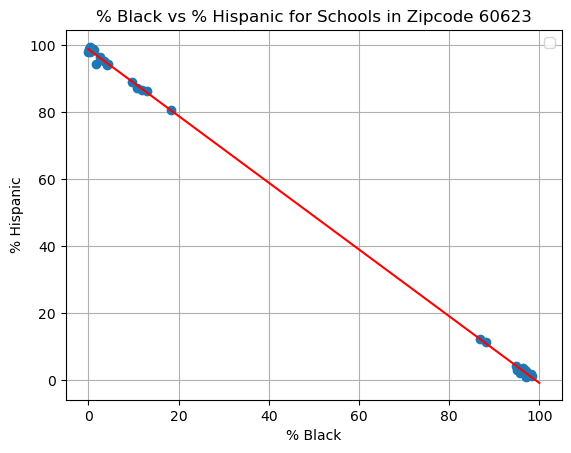

In [8]:
from sklearn.linear_model import LinearRegression #sklearn is a machine learning library
#Define the x and y values
X=df1[["%black"]]
Y=df1[["%hispanic"]]
#create the linear regression model
reg=LinearRegression()
reg.fit(X,Y)
print("Intercept is ", reg.intercept_)
print("Slope is ", reg.coef_)
print("R^2 for OLS is ", reg.score(X,Y))
# x values on the regression line will be between 0 and 100 with a spacing of .01
x = np.arange(0, 100 ,.01) 
# define the regression line y = mx+b here
[[m]]=reg.coef_
[b]=reg.intercept_
y =  m*x  + b   
# plot the school data
df1.plot(x='%black', y='%hispanic', style='o')  
plt.title('% Black vs % Hispanic for Schools in Zipcode 60623')  
plt.xlabel('% Black')  
plt.ylabel('% Hispanic')  
# plot the regression line 
plt.plot(x,y, 'r') #add the color for red
plt.legend([],[], frameon=True)
plt.grid()
plt.savefig("CPSregression1.png")
plt.show()

This scatterplot shows that the CPS schools considered in 60623 are either predominantly hispanic or predominantly black.

:::{admonition} Exercise 2
Modify the steps above to create a dataframe df2 and a scatterplot of % Black (x-axis) vs. % ''graduation_rate_school' (y-axis) in zip 60623.
:::

```{index} parametric curve
```


(mathpatterns)=
## Patterns in Mathematics

Interesting and beautiful patterns arise throughout mathematics. 

(plotparametric)=
### Tracing Parametric Curves

Various patterns can be created using sine, cosine, and exponential functions to define 2D parametric curves. (See the section [parametric equations](./Undergrad/Calculus/6 ParametricEquations.ipynb).)

The parametric equations

$x(t)=\cos(t)[3.5-1.5\mid\cos t\mid \sqrt{1.3+\mid\sin t\mid}+\cos(2t)-3\sin(t)+.7\cos(12.2t)]$

$y(t)=\sin(t)[3.5-1.5\mid\cos t\mid \sqrt{1.3+\mid\sin t\mid}+\cos(2t)-3\sin(t)+.7\cos(12.2t)]$

create a heart-shaped design.

::::{only} latex
:::{note}
Please visit {{ '[the web version of this section]({website}/{path}.html)'.format(website=web_ver_url, path=env.docname) }} to engage with this interactive resource.
:::
::::

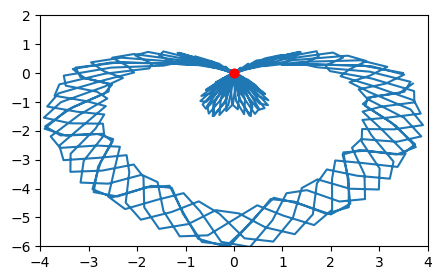

In [9]:
#-----Set Up Plot -----
%matplotlib inline
fig= plt.figure(figsize=(5,3)) 
plt.xlim(-4,4)
plt.ylim(-6,2)
#----Define the Parametric Equations------
t = np.arange(0, 12*np.pi, 0.1) #paramter values from 0 to 12$\pi$ in steps of ,1
xt=np.cos(t)*(3.5-1.5*abs(np.cos(t))*np.sqrt(1.3+abs(np.sin(t)))+np.cos(2*t)-3*np.sin(t)+.7*np.cos(12.2*t))     
yt=np.sin(t)*(3.5-1.5*abs(np.cos(t))*np.sqrt(1.3+abs(np.sin(t)))+np.cos(2*t)-3*np.sin(t)+.7*np.cos(12.2*t))   
plt.gca().plot(xt, yt)
#----Create a Red Dot to Trace the Curve------
def init():
    redDot, = plt.gca().plot([0], [0], 'ro') #starting position of dot
    return redDot,

def animate(i):
    redDot,= plt.gca().plot([np.cos(i)*(3.5-1.5*abs(np.cos(i))*np.sqrt(1.3+abs(np.sin(i)))+np.cos(2*i)-3*np.sin(i)+.7*np.cos(12.2*i))   ], [np.sin(i)*((3.5-1.5*abs(np.cos(i))*np.sqrt(1.3+abs(np.sin(i)))+np.cos(2*i)-3*np.sin(i)+.7*np.cos(12.2*i))  ) ],'ro',ms=2,alpha=1)
    return redDot,

# create animation using the animate() function
ani = animation.FuncAnimation(fig, animate, frames=np.arange(0,12*np.pi,.01), init_func=init, interval=5, blit=True, repeat=False)

plt.show()

:::{admonition} Exercise 3a

What familiar object resembles the parametric curve traced out by the equations 

$x(t)=\sin(t)[e^{\cos t}-2\cos(4t)-\sin^5(t/12)]$,  

$y(t)=\cos(t)[e^{\cos t}-2\cos(4t)-\sin^5(t/12)]$
:::

```{index} quadric surface
```

```{index} level curve
```


(plotquadric)=
### Plotting Quadric Surfaces and Level Curves

Quadric surfaces are another source of interesting patterns and can be constructed and analyzed using level curves. We can use the following function to plot quadric surfaces. The input variable fn is an expression in three variables (x,y,z). The function plot_implicit() plots the implicit relation fn=0 by plotting level curves parallel to the xy plane, xz plane, and yz plane.

In [10]:
def plot_implicit(fn, bbox=(-5,5),resolution=50):
    %matplotlib inline
    ''' create a plot of an implicit function
    fn  ...implicit function (plot where fn==0)
    bbox ..the x,y,and z limits of plotted interval'''
    xmin, xmax, ymin, ymax, zmin, zmax = bbox*3
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    A = np.linspace(xmin, xmax, resolution) # resolution of the contour
    B = np.linspace(xmin, xmax, resolution) # number of slices
    A1,A2 = np.meshgrid(A,A) # grid on which the contour is plotted

    for z in B: # plot level curves parallel to the XY plane
        X,Y = A1,A2
        Z = fn(X,Y,z)
        cset = ax.contour(X, Y, Z+z, [z], zdir='z')
        # [z] defines the only level to plot for this contour for this value of z

    for y in B: # plot level curves parallel the XZ plane
        X,Z = A1,A2
        Y = fn(X,y,Z)
        cset = ax.contour(X, Y+y, Z, [y], zdir='y')

    for x in B: # plot level curves parallel to the YZ plane
        Y,Z = A1,A2
        X = fn(x,Y,Z)
        cset = ax.contour(X+x, Y, Z, [x], zdir='x')

    # must set plot limits because the contour will likely extend
    # well beyond the displayed level.  Otherwise matplotlib extends the plot limits
    # to encompass all values in the contour.
    ax.set_zlim3d(zmin,zmax)
    ax.set_xlim3d(xmin,xmax)
    ax.set_ylim3d(ymin,ymax)

    plt.show()

For example, let us plot the elliptic paraboloid
\begin{equation}
z=(\frac{x}{2})^2+(\frac{y}{3})^2
\end{equation}  

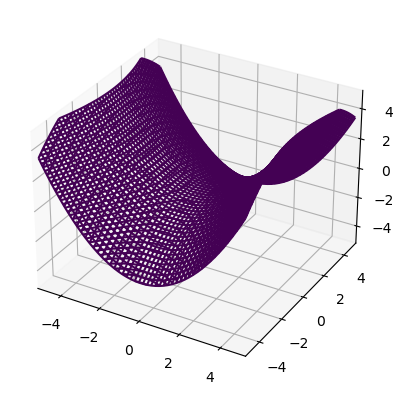

In [11]:
def hyperbolic_paraboloid(x,y,z):
    return (x/2)**2-(y/3)**2-z

plot_implicit(hyperbolic_paraboloid)

We can sketch the level curves of 

$$
z=(\frac{x}{2})^2+(\frac{y}{3})^2
$$

as follows:

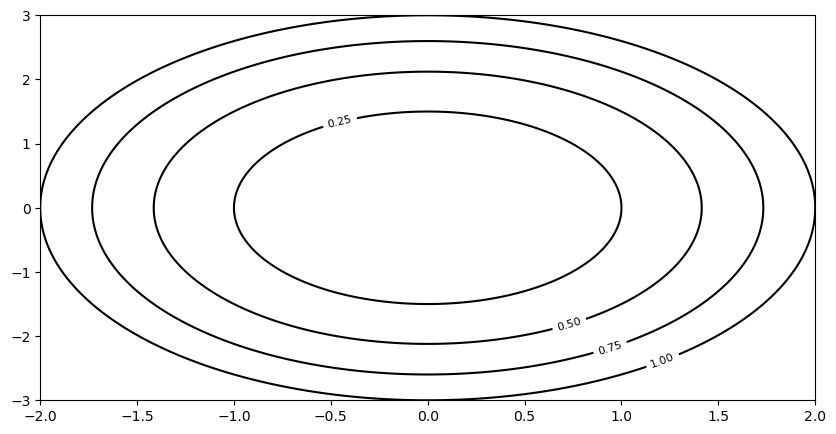

In [12]:
%matplotlib inline
plt.figure(figsize=(10,5))

#---Create grid points at which to evaluate the function z(x,y)
x = np.linspace(-2, 2, 250)
y = np.linspace(-3, 3, 250)
X, Y = np.meshgrid(x, y)
Z=(X/2)**2+(Y/3)**2
#--Create the Contours--
contours=plt.contour(X, Y, Z, levels=np.linspace(0,1,5), colors='black');
#---Plot the Dividing Streamline---------
plt.clabel(contours, inline=True, fontsize=8)
plt.savefig('hyparab.png')

:::{admonition} Exercise 3b 

Make a sketch of the hyperboloid of one sheet defined by

$(\frac{z}{4})^2=(\frac{x}{2})^2+(\frac{y}{3})^2-1.$

Then plot the level curves of the function 

$z=4\sqrt{(\frac{x}{2})^2+(\frac{y}{3})^2-1}.$
:::

(mathinnature)=
## Connecting Patterns in Mathematics to Patterns in Nature and Society

```{index} streamline
```

```{index} source
```

```{index} sink
```

In complex variables, we study functions of a complex variable $f(z)=f(x+iy)=u(x,y)+iv(x,y)$  which maps a complex variable $z=x+iy$ represented by a point $(x,y)$ in the complex plane to another complex variable $u+iv$ modeled as a point $(u,v)$ in another complex plane.

Such functions have wide-ranging applications including applications to analysis of 2-dimensional fluid flow.  

The following function $\Omega(z)$ called a "complex potential" can be used to model a scenario where there is a source of pollution located at (-1,0) as well an extraction well or sink of equal strength located at (1,0).

$$
\Omega(z) = -z - 2\ln(z+1) + 2\ln(z-1)
$$

The imaginary part of $\Omega$ is called the stream function $\Psi$.
The level curves of $\Psi$ are called streamlines, and model the path along which the fluid particles flow.


(pollutedstreamlines)=
### Identifying Streamlines of Polluted and Freshwater Flow

We now make a plot of the streamlines. A Rankine Oval separates the freshwater streamlines from the polluted streamlines.


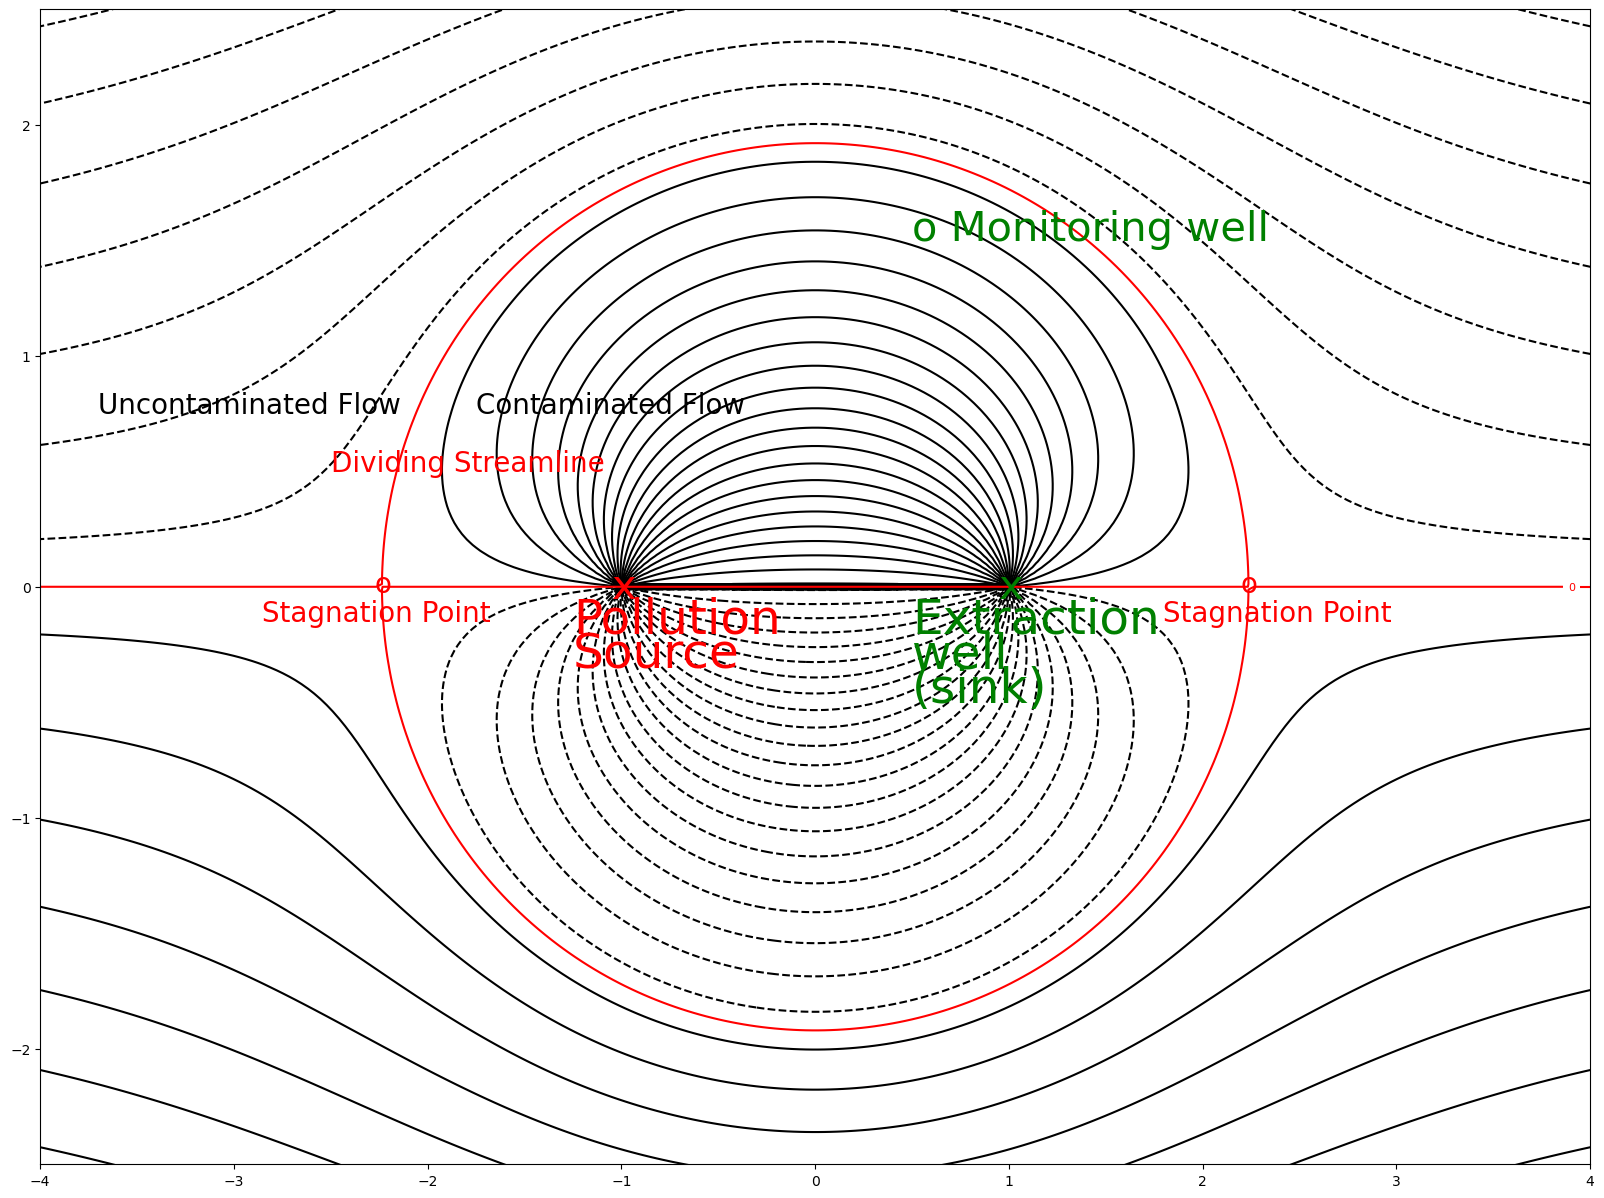

In [13]:
%matplotlib inline
plt.figure(figsize=(20,15))
#---Position for the source---
plt.text(-1.05,-.05,'x',color='r',size=30)
plt.text(-1.25,-.2,'Pollution',color='r',size=35)
plt.text(-1.25,-.35,'Source',color='r',size=35)
plt.xlim(-4, 4)
plt.ylim(-2.5,2.5)
#---Position for the sink---. 
plt.text(.95,-.05,'x',color='g',size=30)
plt.text(.5,-.2,'Extraction',color='g',size=35)
plt.text(.5,-.35,'well',color='g',size=35)
plt.text(.5,-.5,'(sink)',color='g',size=35)

#---Position for the monitoring well---
plt.text(.5,1.5,'o Monitoring well',color='g',size=30)

#---Create grid points at which to evaluate the streamfunction Psi(x,y)
x = np.linspace(-4, 4, 250)
y = np.linspace(-3, 3, 250)
X, Y = np.meshgrid(x, y)
Psi = -Y-2*np.arctan2(Y,(X+1))+2*np.arctan2(Y,(X-1))
#--Create the Contours--
contours=plt.contour(X, Y, Psi, levels=np.linspace(-15,15,100), colors='black');
#---Plot the Dividing Streamline---------
contours=plt.contour(X,Y,Psi,levels=0,colors='red');
plt.text(-2.5,.5,'Dividing Streamline',color='r',size=20)
plt.text(-2.275,-.024,'o',color='r',size=20)
plt.text(2.195,-.024,'o',color='r',size=20)
plt.text(-2.9,-.15,' Stagnation Point',color='r',size=20)
plt.text(1.75,-.15,' Stagnation Point',color='r',size=20)
plt.text(-1.75,.75,'Contaminated Flow',color='k',size=20)
plt.text(-3.7,.75,'Uncontaminated Flow',color='k',size=20)

plt.clabel(contours, inline=True, fontsize=8)
plt.savefig('rankine.png')

Note that the extraction well is sufficiently strong to capture all the pollution streamlines. The boundary between the polluted and freshwater streamlines is called a "Rankine Oval."

:::{admonition} Exercise 4 

Read the paragraph "Model Output" in Section 4 "Contaminant Extraction Modeling" of the The COMPLEX VARIABLES IN GROUNDWATER MODELING chapter. Then explain the difference between an Ineffective, Regular, and Inefficient system. 
:::